In [21]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load to training and testing variables

# Normalize the data
# Not actually required, but makes it easier for network to learn (gotta go fast)
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Create the model (Using sequential model)
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.Flatten())

# Hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # Hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # relu is rectify linear

# Output layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Model training parameters
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs = 3)
# Model is good at fitting, but did it overfit? Want the model to actually generalize


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2622 - accuracy: 0.9231
Epoch 2/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1092 - accuracy: 0.9658
Epoch 3/3
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0732 - accuracy: 0.9771


In [22]:
# Need to validate the data; make sure it is generalized
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0831 - accuracy: 0.9759
0.08308189381957054 0.9759


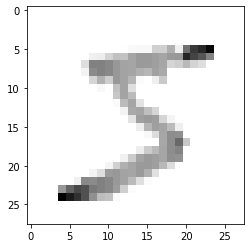

In [13]:
import matplotlib.pyplot as plt
# Show example image
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [23]:
# Save the model
model.save('NumberReader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: NumberReader.model\assets


In [30]:
# Load the model (this did not work for some reason)
new_model = tf.keras.models.load_model('NumberReader.model')

In [38]:
# Make predictions, gives probability density distributions
import numpy as np 
x_test = np.array(x_test)
predictions = model.predict([x_test])

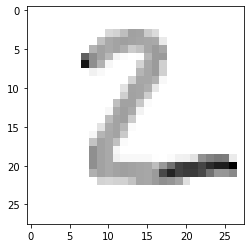

2


In [43]:
# Gotta get the value from the PDFs. Using np.argmax
plt.imshow(x_test[1], cmap = plt.cm.binary)
plt.show()
print(np.argmax([predictions[1]]))